In [2]:
import folium

In [3]:
map_osm = folium.Map(location=[40.5, -74.])

In [4]:
map_osm

In [1]:
import pandas
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams 
%matplotlib inline

filelist = glob.glob("C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\*data.csv")

In [13]:
df = pandas.read_csv(filelist[0])

In [27]:
## set up code for neighborhood divisions
class line:
    def __init__(self, m=None, b=None):
        self.m = m
        self.b = b
    def calculateMandB(self, y1, x1, y2, x2):
        self.m = (y2 - y1)/(x2 - x1)
        self.b = y1 - self.m*x1
    def getY(self, x):
        return self.m*x + self.b
    def getX(self, y):
        return (y-self.b)/self.m
    
# set up line boundaries
# for upper west side
topline_westside = line()
topline_westside.calculateMandB(40.815368, -73.963737,40.808612, -73.94743)
botline_westside = line()
botline_westside.calculateMandB(40.782222,-74.,40.766502,-73.977834)
wesline_westside = line()
#wesline_westside.calculateMandB(40.815368, -73.963737,40.772222,-73.943607)
wesline_westside.calculateMandB(40.782222,-73.993607,40.75701,-74.014936)
easline_westside = line()
easline_westside.calculateMandB(40.808612, -73.94743,40.766502,-73.977834)

# for upper east side
topline_eastside = line()
topline_eastside.calculateMandB(40.808612, -73.94743, 40.801206,-73.927684)
botline_eastside = line()
botline_eastside.calculateMandB(40.766502,-73.977834,40.75922,-73.957558)
wesline_eastside = line()
wesline_eastside.calculateMandB(40.808612, -73.94743,40.766502,-73.977834)
easline_eastside = line()
easline_eastside.calculateMandB(40.801206,-73.927684,40.75922,-73.957558)

# for midtown
topline_midtown = line()
#topline_midtown.calculateMandB(40.772222,-73.943607,40.75922,-73.957558)
topline_midtown.calculateMandB(40.782222,-74.,40.75922,-73.957558)
botline_midtown = line()
botline_midtown.calculateMandB(40.75701,-74.004936,40.743049,-73.971806)
wesline_midtown = line()
wesline_midtown.calculateMandB(40.782222,-73.993607,40.75701,-74.014936)
easline_midtown = line()
easline_midtown.calculateMandB(40.75922,-73.957558,40.743049,-73.971806)

# for lower west (and east for now)
topline_lower = line()
topline_lower.calculateMandB(40.75701,-74.004936,40.743049,-73.971806)
botline_lower = line()
botline_lower.calculateMandB(40.695,-74.022617,40.709792,-73.974895)
wesline_lower = line()
wesline_lower.calculateMandB(40.75701,-74.004936,40.695,-74.022617)
easline_lower = line()
easline_lower.calculateMandB(40.743049,-73.971806,40.709792,-73.974895)

# Governer's Island
topline_gi = line()
topline_gi.calculateMandB(40.695737,-74.027424,40.692874,-74.008026)
botline_gi = line()
botline_gi.calculateMandB(40.686105,-74.029827,40.681419,-74.020729)
wesline_gi = line()
wesline_gi.calculateMandB(40.695737,-74.027424,40.686105,-74.029827)
easline_gi = line()
easline_gi.calculateMandB(40.692874,-74.008026,40.681419,-74.020729)

def comparew(x,y,b):
    if b<0:
        return x>y
    else:
        return x<y
    
def comparee(x,y,b):
    if b>0:
        return x>y
    else:
        return x<y
    
def determineNeighborhood(coord):
    # longitude is the horizontal (x) coordinate
    lat = coord[0]
    lon = coord[1]
    #print lat
    #print lon
    if lat<topline_westside.getY(lon) and lat>botline_westside.getY(lon) and comparew(lat,wesline_westside.getY(lon),wesline_westside.b) and comparee(lat,easline_westside.getY(lon),easline_westside.b):
        #return 'upper west side'
        return 0
    if lat<topline_eastside.getY(lon) and lat>botline_eastside.getY(lon) and comparew(lat,wesline_eastside.getY(lon),wesline_eastside.b) and comparee(lat,easline_eastside.getY(lon),easline_eastside.b):
        #return 'upper east side'
        return 1
    if lat<topline_midtown.getY(lon) and lat>botline_midtown.getY(lon) and comparew(lat,wesline_midtown.getY(lon),wesline_midtown.b) and comparee(lat,easline_midtown.getY(lon),easline_midtown.b):
        #return 'midtown'
        return 2
    if lat<topline_lower.getY(lon) and lat>botline_lower.getY(lon) and comparew(lat,wesline_lower.getY(lon),wesline_lower.b) and comparee(lat,easline_lower.getY(lon),easline_lower.b):
        #return 'lower side'
        return 3
    if lat<topline_gi.getY(lon) and lat>botline_gi.getY(lon) and comparew(lat,wesline_gi.getY(lon),wesline_gi.b) and comparee(lat,easline_gi.getY(lon),easline_gi.b):
        #return 'governers island'
        return 4
        #return 'other'
    return 5



In [29]:
#df = df[['tripduration','bikeid',]]
from datetime import datetime

dfList = []

for afile in filelist:
    df = pandas.read_csv(afile)
    print afile

    #try:
    #    df['starttime'] = pandas.to_datetime(df['starttime'],format='%Y-%m-%d %H:%M:%S')
    #except ValueError:
    #    try:
    #        df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M:%S')
    #    except ValueError:
    #        df['starttime'] = pandas.to_datetime(df['starttime'])
        #df['starttime'] = pandas.to_datetime(df['starttime'],format='%m/%d/%Y %H:%M')
    #df['Year'] = df['starttime'].apply(lambda x: x.year)
    #df['Month'] = df['starttime'].apply(lambda x: x.month)
    #df['Day'] = df['starttime'].apply(lambda x: x.day)
    #df = df[['tripduration','bikeid','Year','Month']]
    df = df[['tripduration','bikeid','start station latitude','start station longitude']]
    #add the column for the neighborhood code (0: upper west, 1: upper east, 2: midtown, 3: lower west, 4: lower east, 5 governers island, 6 o.w.)
#df.head()
    df['neighborhood'] = df[['start station latitude','start station longitude']].apply(lambda x: determineNeighborhood(x), axis=1)
    dfList.append(df)
#df.head()

C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-07 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-08 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-09 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-10 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-11 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2013-12 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-01 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-02 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-03 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-04 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-05 - Citi Bike trip data.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\2014-06 - Citi Bike trip data.csv
C:\Users\Rich\Do

In [3]:
import datetime
import os

monthlist = []
for item in filelist:
    path, afile = os.path.split(item)
    #print afile
    try:
        monthlist.append(datetime.datetime(int(afile[0:4]), int(afile[5:7]),1))
    except ValueError:
        monthlist.append(datetime.datetime(int(afile[0:4]), int(afile[4:6]),1))

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
%matplotlib inline

index = 0
for df in dfList:
    #if index > 0:
    df['tripduration'] = df['tripduration'].apply(lambda x: float(x)/60.)
    #print df['tripduration'].values
    timetitle = monthlist[index].strftime('%b %Y')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(df['tripduration'].values,range=(0,60), bins=60, normed=True)
    plt.xlabel('tripduration (minutes)')
    plt.ylabel('normalized counts')
    ax.set_ylim([0,0.1])
    plt.title(timetitle)

    #plt.show()
    
    fig.savefig(filelist[index]+'tripDuration.jpg')
    fig.clear()
    
    index += 1
    

C:\Users\Rich\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [39]:
## trip duration by neighborhood
import matplotlib.pyplot as plt
from matplotlib import rcParams 
%matplotlib inline

index = 0
for df in dfList:
    #if index > 0:
    #    df['tripduration'] = df['tripduration'].apply(lambda x: float(x)/60.)
    #print df['tripduration'].values
    df_0 = df[df['neighborhood']==0]
    df_1 = df[df['neighborhood']==1]
    df_2 = df[df['neighborhood']==2]  
    df_3 = df[df['neighborhood']==3] 
    df_4 = df[df['neighborhood']==4]
    df_5 = df[df['neighborhood']==5]
    
    datalist = []
    datalist.append(df_0.tripduration.values)
    datalist.append(df_1.tripduration.values)
    datalist.append(df_2.tripduration.values)
    datalist.append(df_3.tripduration.values)
    datalist.append(df_4.tripduration.values)
    datalist.append(df_5.tripduration.values)
    labels = []
    labels.append('upper west')
    labels.append('upper east')
    labels.append('midtown')
    labels.append('lower')
    labels.append('governers island')
    labels.append('other')

    
    timetitle = monthlist[index].strftime('%b %Y')
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(datalist,range=(0,60), bins=60, normed=True,stacked=True,label=labels,histtype='barstacked',log=True)
    plt.xlabel('tripduration (minutes)')
    plt.ylabel('normalized counts')
    ax.set_ylim([0,0.1])
    plt.title(timetitle)
    legend = ax.legend(loc='upper right', shadow=True)

    #plt.show()
    
    fig.savefig(filelist[index]+'tripDurationByNeighborhoodLog.jpg')
    fig.clear()
    
    index += 1


In [13]:
monthlist[0]

datetime.datetime(2013, 7, 1, 0, 0)

In [16]:
bikedict = {}

#df_temp = dfList[0].groupby('bikeid').sum()
count = 0
for d in dfList:
    print count
#    d = d['tripduration','bikeid']
    d_grouped = d.groupby('bikeid').sum()
    bikeidList = d_grouped.index
    tripdurationList = d_grouped.values
    
    for i in xrange(0,len(bikeidList)):
        try:
            bikedict[bikeidList[i]].append((monthlist[count],tripdurationList[i][0]))
        except KeyError:
            bikedict[bikeidList[i]] = [(monthlist[count], tripdurationList[i][0])]
                                                      
    
    count += 1
#print df_temp
#df_temp['tripduration'].values
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [19]:
print len(bikedict.keys())
print bikedict.values()

9423
[[(datetime.datetime(2013, 7, 1, 0, 0), 100825), (datetime.datetime(2013, 8, 1, 0, 0), 188884), (datetime.datetime(2013, 9, 1, 0, 0), 141705), (datetime.datetime(2013, 10, 1, 0, 0), 168027), (datetime.datetime(2013, 11, 1, 0, 0), 73637), (datetime.datetime(2013, 12, 1, 0, 0), 45048), (datetime.datetime(2014, 1, 1, 0, 0), 22851), (datetime.datetime(2014, 2, 1, 0, 0), 11476), (datetime.datetime(2014, 3, 1, 0, 0), 14396), (datetime.datetime(2014, 4, 1, 0, 0), 129451), (datetime.datetime(2014, 5, 1, 0, 0), 205918), (datetime.datetime(2014, 6, 1, 0, 0), 144135), (datetime.datetime(2014, 7, 1, 0, 0), 89121), (datetime.datetime(2014, 8, 1, 0, 0), 179908), (datetime.datetime(2014, 9, 1, 0, 0), 137175), (datetime.datetime(2014, 10, 1, 0, 0), 101349), (datetime.datetime(2014, 11, 1, 0, 0), 103763), (datetime.datetime(2014, 12, 1, 0, 0), 53606), (datetime.datetime(2015, 1, 1, 0, 0), 59562), (datetime.datetime(2015, 3, 1, 0, 0), 32154), (datetime.datetime(2015, 4, 1, 0, 0), 453182), (datetime

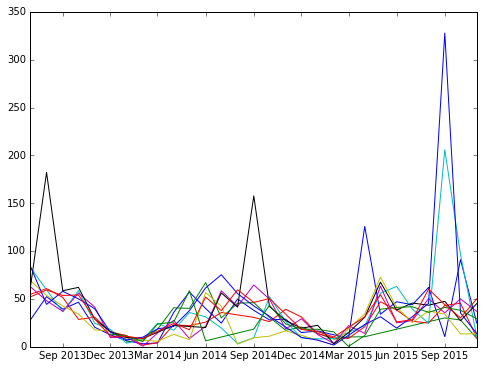

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

count = 0
for key in bikedict.keys():
    x = []
    y = []
    #print count
    count += 1
    if count > 10:
        break
    for i in xrange(0,len(bikedict[key])):
        x.append(bikedict[key][i][0])
        y.append(bikedict[key][i][1]/3600.)
    
    #print x
    plt.plot(x,y)
        



In [35]:
df_grouped = df.groupby([df['bikeid'],df['Year'],df['Month']])

In [33]:
import plotly.plotly as py
from plotly.graph_objs import *

In [ ]:
trace1 = Heatmap(
    z=],  # link 2D array
    x=the_months_JanAug,   # link x-axis labels
    y=the_days,            # link y-axis labels
    colorscale='YIGnBu',   # (!) select pre-defined colormap
    reversescale=True      # (!) reverve color ordering
)

In [25]:
df_grouped = df_grouped.sum()

In [36]:
df_test = pandas.DataFrame({'tripduration': df_grouped.sum()}).reset_index()

ValueError: If using all scalar values, you must pass an index

In [16]:
import numpy as np

tripduration = np.array()

TypeError: Required argument 'object' (pos 1) not found

In [17]:
## do some clustering by birthdate
import numpy as np
dfList = []

pandas.read_csv(filelist[0], na_values="NaN").head()

for afile in filelist[-12:]:
    df = pandas.read_csv(afile, na_values="NaN")
    df = df[np.isfinite(df['birth year'])]
    df = df[['birth year','start station id']]
    dfList.append(df)
    print afile


C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201412-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201501-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201502-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201503-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201504-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201505-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201506-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201507-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201508-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201509-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201510-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201511-citibike-tripdata.csv


In [18]:
dfList[0]

birth year  start station id
1             1988               498
2             1983               444
4             1986               519
5             1973               229
6             1986               229
7             1990               305
8             1982                82
9             1983               470
11            1983               465
12            1981               369
13            1970               386
14            1983               369
15            1983               487
16            1979               536
17            1991               300
18            1989               448
19            1991               237
20            1981               515
22            1968               369
23            1953               501
24            1993               161
25            1964               444
26            1988               459
27            1987               364
29            1986               505
30            1966               523
31            1973               532
33            1957               476
34            1984               324
36            1987               433
...            ...               ...
399037        1988               302
399039        1969               434
399040        1965               499
399041        1974               329
399042        1980               476
399043        1985               433
399044        1983               485
399045        1980               250
399046        1949               417
399047        1965               360
399048        1979               285
399049        1980               285
399050        1961               432
399051        1970               546
399052        1963               434
399053        1977               524
399054        1985               419
399055        1987               419
399056        1991               144
399057        1977               291
399058        1960               236
399059        1969               223
399060        1985               331
399061        1966               492
399063        1959               523
399064        1982                82
399065        1971               325
399066        1963               536
399067        1984               293
399068        1984               440

[382573 rows x 2 columns]

In [21]:
df = pandas.concat(dfList)

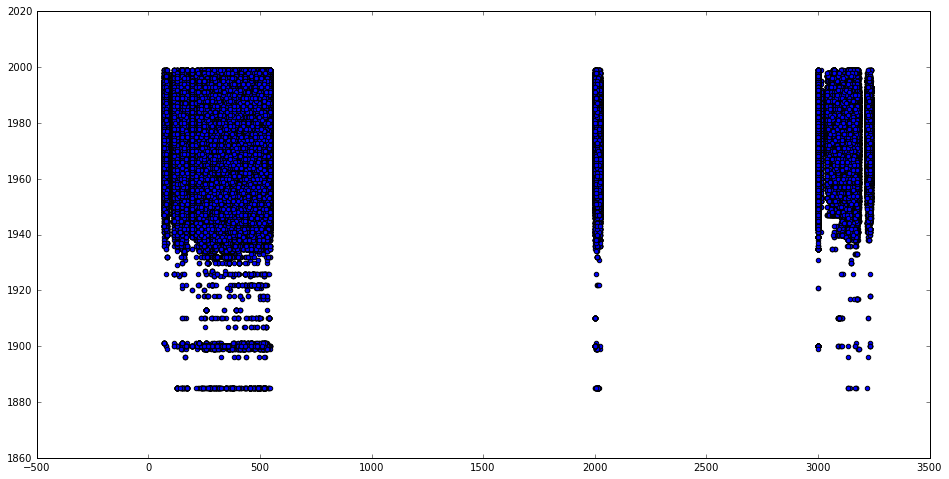

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,8))

df['start station id'].map(int)
df['birth year'].map(int)

ax.scatter(x=df['start station id'].values, y=df['birth year'].values)

plt.show()

In [48]:
from sklearn.cluster import KMeans

print type(df['start station id'].values)
l = len(df['start station id'].values)

X = np.stack((df['start station id'].values,df['birth year'].values)).T
print len(X)

print X

kmodel = KMeans()

kmodel.fit(X)

<type 'numpy.ndarray'>
8272916
[[  498.  1988.]
 [  444.  1983.]
 [  519.  1986.]
 ..., 
 [ 3161.  1974.]
 [ 3110.  1982.]
 [  279.  1958.]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [51]:
kmodel.predict([498,1988])[0]

5

In [57]:
dfList = []

pandas.read_csv(filelist[0], na_values="NaN").head()

#print df[['start station id','birth year']]

for afile in filelist[-12:]:
    df = pandas.read_csv(afile, na_values="NaN")
    df = df[np.isfinite(df['birth year'])]
    df = df[np.isfinite(df['start station id'])]
    df = df[['birth year','start station id','start station latitude','start station longitude']]
    df['cluster'] = df[['start station id','birth year']].apply(lambda x: kmodel.predict([x[1],x[2]])[0])
    dfList.append(df)
    print afile

C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201412-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201501-citibike-tripdata.csv
C:\Users\Rich\Documents\GitHub\CitiBikeApp\data\201502-citibike-tripdata.csv


KeyError: (2L, u'occurred at index start station id')